<a href="https://colab.research.google.com/github/micaelCZ/Paper_Repositorio/blob/main/EscenarioC_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Escenarios experimentales Internetworking</h1></center>

Presentado por: Holger Fernando Catucuamba Nepas <br>
Fecha: 23/02/2023

##  Importación de librerias necesarias

In [192]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Cargar el Dataset

In [193]:
datapath = 'https://raw.githubusercontent.com/micaelCZ/Paper_Repositorio/main/dataset/datasetPreprocesado/Escenario3.csv'
names = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label']
dataframe = pd.read_csv(datapath,names=names,low_memory=False, sep=';')

In [194]:
dataframe.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,...,,2,2,7,4,1,1,3,NaN,0
1,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864.748,19410,1087890,31,...,,3,1,4,4,1,1,1,NaN,0
2,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,,3,5,2,7,1,1,4,NaN,0
3,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,,1,1,4,7,1,1,3,NaN,0
4,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,,2,5,2,1,1,1,2,NaN,0


### Descripción del problema

In [195]:
dataframe.describe()

,sport,sbytes,dbytes,sttl,dttl,sloss,dloss,Spkts,Dpkts,swin,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
count,3000.00000,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,621.000000,82.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,32747.94900,8.475333e+03,3.095792e+04,110.831333,110.269000,6.288333,14.102333,30.912000,36.679333,184.025000,...,1.096618,1.073171,4.399667,4.12000,2.647667,2.994000,1.467333,1.029333,3.257000,0.500000
std,19863.14715,6.575680e+04,1.593243e+05,102.249355,111.227103,25.673714,56.775326,75.075755,119.951826,114.304547,...,0.530068,0.465620,6.023235,5.88437,2.324650,2.624295,1.804444,0.210921,5.638813,0.500083
min,0.00000,4.600000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,15253.75000,5.640000e+02,2.680000e+02,31.000000,29.000000,0.000000,0.000000,4.000000,4.000000,0.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,33027.50000,1.251000e+03,1.231000e+03,62.000000,29.000000,2.000000,2.000000,10.000000,8.000000,255.000000,...,1.000000,1.000000,2.000000,2.00000,2.000000,2.000000,1.000000,1.000000,2.000000,0.500000
75%,50372.75000,2.934000e+03,1.016800e+04,254.000000,252.000000,7.000000,9.000000,38.000000,34.000000,255.000000,...,1.000000,1.000000,6.000000,5.00000,4.000000,4.000000,1.000000,1.000000,3.000000,1.000000
max,65532.00000,2.654524e+06,2.374900e+06,254.000000,252.000000,999.000000,895.000000,2004.000000,1796.000000,255.000000,...,4.000000,4.000000,36.000000,36.00000,16.000000,16.000000,16.000000,4.000000,36.000000,1.000000


## Normalizar los datos

In [196]:
columna_a_codificar = dataframe['srcip']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['srcip'] = columna_codificada

In [197]:
columna_a_codificar = dataframe['dstip']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['dstip'] = columna_codificada

In [198]:
columna_a_codificar = dataframe['dsport']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['dsport'] = columna_codificada

In [199]:
columna_a_codificar = dataframe['proto']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['proto'] = columna_codificada

In [200]:
columna_a_codificar = dataframe['state']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['state'] = columna_codificada

In [201]:
columna_a_codificar = dataframe['dur']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['dur'] = columna_codificada

In [202]:
columna_a_codificar = dataframe['service']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['service'] = columna_codificada

In [203]:
columna_a_codificar = dataframe['Sload']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Sload'] = columna_codificada

In [204]:
columna_a_codificar = dataframe['Dload']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Dload'] = columna_codificada

In [205]:
columna_a_codificar = dataframe['Sjit']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Sjit'] = columna_codificada

In [206]:
columna_a_codificar = dataframe['Djit']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Djit'] = columna_codificada

In [207]:
columna_a_codificar = dataframe['Sintpkt']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Sintpkt'] = columna_codificada

In [208]:
columna_a_codificar = dataframe['Dintpkt']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Dintpkt'] = columna_codificada

In [209]:
columna_a_codificar = dataframe['ct_ftp_cmd']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['ct_ftp_cmd'] = columna_codificada

In [210]:
columna_a_codificar = dataframe['attack_cat']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['attack_cat'] = columna_codificada

## Separar las características del conjunto de datos en una matriz separada

In [211]:
X = dataframe.iloc[:, :-1].values
scaler = StandardScaler()
x_normalised = scaler.fit_transform(X)
y = dataframe['label']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(x_normalised,
                                            y, test_size=0.3, random_state=42)

In [213]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(num_filters, kernel_size, batch_size):
    model = Sequential()
    model.add(Conv1D(filters=num_filters, input_shape=(X_train.shape[1], 1), kernel_size=kernel_size, strides=1, padding='valid'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {'num_filters': [32, 64, 128],
              'kernel_size': [3, 5, 7],
              'batch_size': [32, 64, 128]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

print(f"Best Score: {grid_result.best_score_} using {grid_result.best_params_}")

<ipython-input-213-dcbbe72378c5>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best Score: 0.49095238248507184 using {'batch_size': 32, 'kernel_size': 3, 'num_filters': 32}


## Crear Modelo

In [214]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

# 1st Convolutional Layer
model.add(Conv1D(filters=32, input_shape=(X_train.shape[1], 1), kernel_size=3, strides=1, padding='valid'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling1D(pool_size=3, strides=1, padding='valid'))

# 2nd Convolutional Layer
model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='valid'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling1D(pool_size=3, strides=1, padding='valid'))

# 3rd Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='valid'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling1D(pool_size=3, strides=2, padding='valid'))

# 5th Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='valid'))
model.add(Activation('relu'))

# 6th Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='valid'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling1D(pool_size=3, strides=2, padding='valid'))

# Fully Connected layer
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(512))
model.add(Activation('relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.3))

# 2nd Fully Connected Layer
model.add(Dense(256))
model.add(Activation('relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_336"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_361 (Conv1D)         (None, 46, 32)            128       
                                                                 
 activation_48 (Activation)  (None, 46, 32)            0         
                                                                 
 max_pooling1d_352 (MaxPooli  (None, 44, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_362 (Conv1D)         (None, 42, 32)            3104      
                                                                 
 activation_49 (Activation)  (None, 42, 32)            0         
                                                                 
 max_pooling1d_353 (MaxPooli  (None, 40, 32)           0         
 ng1D)                                              

In [215]:
batch_size = 32
steps_per_epoch = (X_train.shape[0]//batch_size)
validation_steps = (x_normalised.shape[0]// batch_size)

es = EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=20)

In [216]:
%%time

# Entrenar el modelo
model.fit(X_train, y_train,
    steps_per_epoch=steps_per_epoch,
    epochs = 35,
    validation_data=(X_test, y_test),
    validation_steps=validation_steps,
    batch_size = batch_size,
    callbacks=[es],
    verbose=1)

Epoch 1/35
65/65 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4918

65/65 [==============================] - 4s 38ms/step - loss: nan - accuracy: 0.4918 - val_loss: nan - val_accuracy: 0.5211
Epoch 2/35
65/65 [==============================] - 2s 28ms/step - loss: nan - accuracy: 0.4927
Epoch 3/35
65/65 [==============================] - 3s 41ms/step - loss: nan - accuracy: 0.4903
Epoch 4/35
65/65 [==============================] - 3s 51ms/step - loss: nan - accuracy: 0.4869
Epoch 5/35
65/65 [==============================] - 2s 28ms/step - loss: nan - accuracy: 0.4961
Epoch 6/35
65/65 [==============================] - 2s 28ms/step - loss: nan - accuracy: 0.4807
Epoch 7/35
65/65 [==============================] - 2s 28ms/step - loss: nan - accuracy: 0.5015
Epoch 8/35
65/65 [==============================] - 2s 28ms/step - loss: nan - accuracy: 0.4903
Epoch 9/35
65/65 [==============================] - 3s 43ms/step - loss: nan - accuracy: 0.4850
Epoch 10/35
65/65 [==============================] - 2s 32ms/step - loss: nan - accuracy: 0.4874
Epoch 11/35

In [217]:
loss, accuracy = model.evaluate(X_test,y_test,batch_size=batch_size)
print('test_loss: %.2f' % (loss * 100.0))  
print('test_accuracy: %.2f' % (accuracy * 100.0))

29/29 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5211
test_loss: nan
test_accuracy: 52.11


In [218]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model_probs = model.predict(X_test,batch_size=batch_size,verbose=0)
# predict crisp classes for test set
model_classes = np.argmax(model_probs,axis=1)
# reduce to 1d array
model_probs = model_probs[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, model_classes)*100
# precision tp / (tp + fp)
precision = precision_score(y_test, model_classes, average='weighted')*100
# recall: tp / (tp + fn)
recall = recall_score(y_test, model_classes, average='weighted')*100
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, model_classes, average='weighted')*100

print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)

Accuracy: 52.11
F1 score: 35.71
Precision: 27.16
Recall: 52.11


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gráfico Roc Curve

29/29 [==============================] - 0s 7ms/step


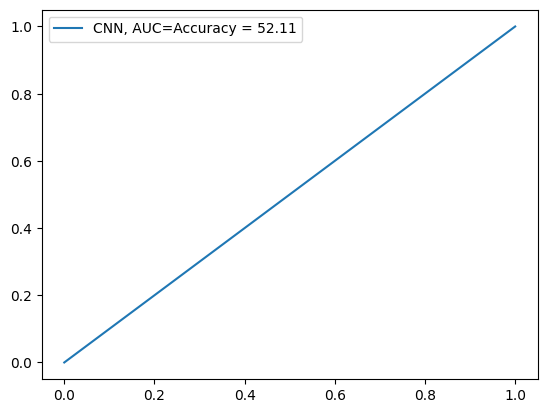

In [219]:
import matplotlib.pyplot as plt
from sklearn import metrics
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
CNN = "Accuracy = {:.2f}".format(accuracy*100)
plt.plot(fpr, tpr, label="CNN, AUC=" + str(CNN))
plt.legend()